# Atividade em Grupo 1

1. Plote as respostas das posições x1 e x3 no tempo, até chegar em regime permanente, caso se coloque x2 em uma posição inicial igual a 0,1 m. Não é aplicado força alguma em f. 

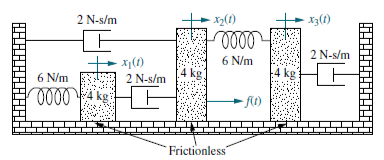

In [106]:
try:
  import sympy
except ImportError:
  !pip install sympy

In [107]:
%matplotlib inline
import numpy as np
import math
import scipy
from scipy.special import erfc
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.rcParams.update({'font.size': 10})
from ipywidgets import interact, fixed
%matplotlib notebook
import sympy as sp
sp.init_session(quiet=True)
plt.rcParams.update({'font.size': 10})
from sympy import *

In [108]:
init_printing()
f = sp.symbols('f', cls=sp.Function)
F = sp.symbols('F', cls=sp.Function)
G = sp.symbols('G', cls=sp.Function)

x_1 = sp.symbols('x_1', cls=sp.Function)
x_2 = sp.symbols('x_2', cls=sp.Function)
x_3 = sp.symbols('x_3', cls=sp.Function)

x0_2 = sp.symbols('x0_2', real=True, positive=True)

X_1 = sp.symbols('X_1', cls=sp.Function)
X_2 = sp.symbols('X_2', cls=sp.Function)
X_3 = sp.symbols('X_3', cls=sp.Function)

s = sp.symbols('s', real=True, positive=True)
t = sp.symbols('t', real=True, positive=True)

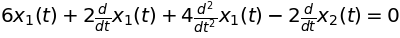

In [109]:
Eq1 = sp.Eq(4*sp.diff(x_1(t),t,2)+2*sp.diff(x_1(t),t,1)+6*x_1(t)-2*sp.diff(x_2(t),t,1),0)
Eq1

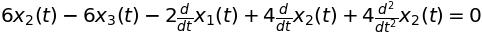

In [110]:
Eq2 = sp.Eq(-2*sp.diff(x_1(t),t,1)+4*sp.diff(x_2(t),t,2)+6*x_2(t)+4*sp.diff(x_2(t),t,1)-6*x_3(t),0)
Eq2

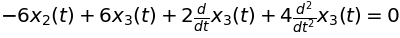

In [111]:
Eq3 = sp.Eq(4*sp.diff(x_3(t),t,2)+6*x_3(t)+2*sp.diff(x_3(t),t,1)-6*x_2(t),0)
Eq3

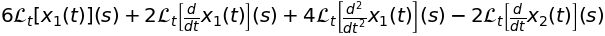

In [112]:
sp.laplace_transform(Eq1.lhs,t,s, noconds=True)

In [113]:
TRS1 = sp.Eq((4*s**2+2*s+6)*X_1(s)-2*(s*X_2(s)-x0_2), 0)
TRS1

In [114]:
TRS2 = sp.Eq(-2*s*X_1(s)+(4*(X_2(s)*s**2-x0_2)+4*(X_2(s)*s-x0_2)+6*X_2(s))-6*X_3(s), 0)
TRS2

In [115]:
TRS3 = sp.Eq(-6*X_2(s)+(4*s**2+2*s+6)*X_3(s), 0)
TRS3

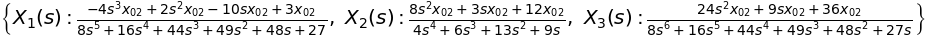

In [116]:
sp.solve([TRS1,TRS2,TRS3],(X_1(s),X_2(s),X_3(s)))

In [117]:
TRS1_ = TRS1.subs({x0_2:0.1})
TRS2_ = TRS2.subs({x0_2:0.1})

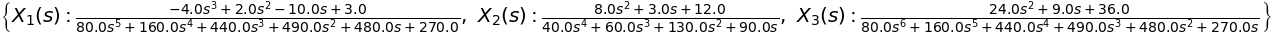

In [118]:
sp.solve([TRS1_,TRS2_,TRS3],(X_1(s),X_2(s),X_3(s)))

Este código abaixo demorou muito e não deu o resultado, provavelmente devido a complexidade da função...

```
# defining the simbols 't' and 's'
t, s = sympy.symbols('t, s')

def L(f):
  return sp.laplace_transform(f, t, s, noconds=True)


# Function to apply the Inverse Laplace transform in the function 'F' given
def InL(F):
  return sp.inverse_laplace_transform(F, s, t)

 
# defining a function to be transformed in the nexts stages - from s to t
Y1 = [(24*s**2+9*s+36) / (80*s**6+160*s**5+440*s**4+490*s**3+480*s**2+270*s)]

# function to decompose the given function in parcial fractions
Y1.append(Y1[0].apart(s))

# Inverse Laplace transform
Y1.append(InL(Y1[1]))

print('A solução é x(t) = ')
Y1[2]
```



# Utilizando a biblioteca de Controle

Resolver usando o pacote [Python Control Systems Library](http://python-control.readthedocs.io/en/latest/)
Veja exemplos em [5.1 Getting Started with Transfer Functions](https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/05.01-Getting-Started-with-Transfer-Functions.ipynb)

In [119]:
try:
  import slycot
except ImportError:
  !pip install slycot

try:
  import control
except ImportError:
  !pip install control

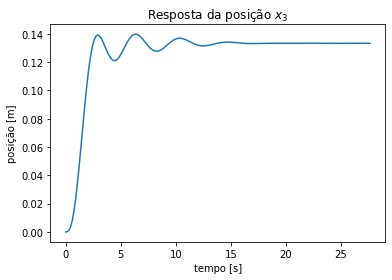

In [120]:
%matplotlib inline

import os
import matplotlib.pyplot as plt   # MATLAB plotting functions
import control.matlab
from control.matlab import *  # MATLAB-like functions

# Create a variable 's' to allow algebra operations for SISO systems
s = tf('s')
G = (24*s**2+9*s+36) / (80*s**6+160*s**5+440*s**4+490*s**3+480*s**2+270*s)

# Resposta de x_3
plt.figure(1)
yout, T = step(G*s) # tem que multiplicar por s, pq o step plota a resposta a um degrau que multiplicaria G por 1/s
plt.title('Resposta da posição $x_3$')
plt.ylabel('posição [m]')
plt.xlabel('tempo [s]')
plt.plot(T.T, yout.T)
plt.show(block=False)